#4sight
- RM566274 Arthur Nishiyama
- RM564100 Cynthia Emiko de Souza Takematu
- RM561541 Diogo Santana do Nascimento
- RM563739 Gabriel Scaraficci de Lima

#Importação de bibliotecas e banco de dados

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from pathlib import Path

In [ ]:
df_cb = pd.read_csv('df_t.csv')
df_cb.head()

,nk_ota_localizer_id,fk_contact,date_purchase,time_purchase,place_origin_departure,place_destination_departure,place_origin_return,place_destination_return,fk_departure_ota_bus_company,fk_return_ota_bus_company,gmv_success,total_tickets_quantity_success
0,bc02d5245bec63b30ff1102fa273fc03f58bc9cc3f674e...,a7218ff4ee7d37d48d2b4391b955627cb089870b934912...,2018-12-26,15:33:35,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,50e9a8665b62c8d68bccc77c7c92431a1aa26ccbd38ed4...,0,0,8527a891e224136950ff32ca212b45bc93f69fbb801c3b...,1,89.09,1
1,5432f12612dd5d749b3be880e779989cf63b5efa4bcc4e...,37228485e0dc83d84d1bcd1bef3dc632301bf6cb22c8b5...,2018-12-05,15:07:57,10e4e7caf8b078429bb1c80b1a10118ac6f963eff098fd...,e6d41d208672a4e50b86d959f4a6254975e6fb9b088116...,0,0,36ebe205bcdfc499a25e6923f4450fa8d48196ceb4fa0c...,1,155.97,1
2,fb3caed9b2f1b6016d45ccddb19095476e61a2c85faa8e...,3467ec081e2421e72c96e7203b929d21927fd00b6b5f28...,2018-12-21,18:41:54,7688b6ef52555962d008fff894223582c484517cea7da4...,8c1f1046219ddd216a023f792356ddf127fce372a72ec9...,0,0,ec2e990b934dde55cb87300629cedfc21b15cd28bbcf77...,1,121.99,1
3,4dc44a6dd592b702feccb493d192210c86965aee684529...,ab3251a2be0f69713b8f97b0e9d1579e31551f4fd4facf...,2018-12-06,14:01:38,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,d6acb3c1a79e57bcc03d976cb4d98f56edccd4cf426392...,0,0,5f9c4ab08cac7457e9111a30e4664920607ea2c115a143...,1,55.22,1
4,aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181...,ceea0de820a6379f2c4215bddaec66c33994b304607e56...,2021-02-23,20:08:25,7688b6ef52555962d008fff894223582c484517cea7da4...,23765fc69c4e3c0b10f5d15471dc2245e2a19af16b513f...,0,0,48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c...,1,45.31,1


#Tratamento de dados
Filtragem de dados a partir de 2021
- remoção de linhas com valores de 'gmv_success' vazios (caso houver)
- renomear valores para legibilidade (mantendo a reprodutibilidade)
  - exceto as colunas de id (id_compra e id_cliente)

In [ ]:
df_2021 = df_cb[df_cb['date_purchase'] >= '2021-01-01']
df_2021.head()

,nk_ota_localizer_id,fk_contact,date_purchase,time_purchase,place_origin_departure,place_destination_departure,place_origin_return,place_destination_return,fk_departure_ota_bus_company,fk_return_ota_bus_company,gmv_success,total_tickets_quantity_success
4,aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181...,ceea0de820a6379f2c4215bddaec66c33994b304607e56...,2021-02-23,20:08:25,7688b6ef52555962d008fff894223582c484517cea7da4...,23765fc69c4e3c0b10f5d15471dc2245e2a19af16b513f...,0,0,48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c...,1,45.31,1
5,948356b25b90c0c87c147cead27483c481edda1dacc4c8...,37f13b6dae3cfd6e82caf88c4e361a5b2035b66c383ba2...,2021-02-11,22:25:15,d26eae87829adde551bf4b852f9da6b8c3c2db9b65b8b6...,482d9673cfee5de391f97fde4d1c84f9f8d6f2cf0784fc...,0,0,1dfacb2ea5a03e0a915999e03b5a56196f1b1664d2f768...,1,154.20,1
6,2ee9d0978acb5e113d0b3f846ab3f88c5a426321da8f87...,e15109b0b8e9f6f1554e560837eb55543f035f91d8be4f...,2021-02-19,19:11:40,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,be47addbcb8f60566a3d7fd5a36f8195798e2848b36819...,0,0,1d0ebea552eb43d0b1e1561f6de8ae92e3de7f1abec523...,1,188.99,1
9,929cd361c225ec5d3510e14e8582fdcc61a24383cdb7a7...,f914295cdc6f40aae952cd1457650eac8a6f74a57a4923...,2021-07-02,11:41:19,90b5bc7f03c840b2efddb22ffdfc37dd12cb391b49aa0f...,f6103ca1e01bd200a9258a366b7e8c22a542e771bf11a0...,0,0,c6f3ac57944a531490cd39902d0f777715fd005efac9a3...,1,61.55,1
10,f08c3f551a19f1ce13525825dbf0d0ce9c3492da92bbb2...,17427df9b085e934834e8fe1b6bce73f46f75facfa7f91...,2022-07-14,10:16:52,20ca98162ba780883712eb701c84e4c06f73aba78e9039...,a77b6cbdf6fae1676369dea1e1ea675e4c2400c9e43bd5...,0,0,96061e92f58e4bdcdee73df36183fe3ac64747c81c26f6...,1,55.46,1


In [ ]:
df_2021.dropna(subset =['gmv_success'])

,nk_ota_localizer_id,fk_contact,date_purchase,time_purchase,place_origin_departure,place_destination_departure,place_origin_return,place_destination_return,fk_departure_ota_bus_company,fk_return_ota_bus_company,gmv_success,total_tickets_quantity_success
4,aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181...,ceea0de820a6379f2c4215bddaec66c33994b304607e56...,2021-02-23,20:08:25,7688b6ef52555962d008fff894223582c484517cea7da4...,23765fc69c4e3c0b10f5d15471dc2245e2a19af16b513f...,0,0,48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c...,1,45.31,1
5,948356b25b90c0c87c147cead27483c481edda1dacc4c8...,37f13b6dae3cfd6e82caf88c4e361a5b2035b66c383ba2...,2021-02-11,22:25:15,d26eae87829adde551bf4b852f9da6b8c3c2db9b65b8b6...,482d9673cfee5de391f97fde4d1c84f9f8d6f2cf0784fc...,0,0,1dfacb2ea5a03e0a915999e03b5a56196f1b1664d2f768...,1,154.20,1
6,2ee9d0978acb5e113d0b3f846ab3f88c5a426321da8f87...,e15109b0b8e9f6f1554e560837eb55543f035f91d8be4f...,2021-02-19,19:11:40,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,be47addbcb8f60566a3d7fd5a36f8195798e2848b36819...,0,0,1d0ebea552eb43d0b1e1561f6de8ae92e3de7f1abec523...,1,188.99,1
9,929cd361c225ec5d3510e14e8582fdcc61a24383cdb7a7...,f914295cdc6f40aae952cd1457650eac8a6f74a57a4923...,2021-07-02,11:41:19,90b5bc7f03c840b2efddb22ffdfc37dd12cb391b49aa0f...,f6103ca1e01bd200a9258a366b7e8c22a542e771bf11a0...,0,0,c6f3ac57944a531490cd39902d0f777715fd005efac9a3...,1,61.55,1
10,f08c3f551a19f1ce13525825dbf0d0ce9c3492da92bbb2...,17427df9b085e934834e8fe1b6bce73f46f75facfa7f91...,2022-07-14,10:16:52,20ca98162ba780883712eb701c84e4c06f73aba78e9039...,a77b6cbdf6fae1676369dea1e1ea675e4c2400c9e43bd5...,0,0,96061e92f58e4bdcdee73df36183fe3ac64747c81c26f6...,1,55.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1741337,52a39652c7b3db7eedbba20c16b4e68df6f514bec1ad79...,34bef92c568790d6e1e68a3ba24b89390395295a49783d...,2023-04-21,13:24:41,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,ef2d127de37b942baad06145e54b0c619a1f22327b2ebb...,0,0,35135aaa6cc23891b40cb3f378c53a17a1127210ce60e1...,1,135.23,1
1741338,655038f142aea0104f73671352b3304617b8d19801495a...,b79256341d874ddd572f6dabc83190ada87eea6262c81e...,2023-04-08,10:49:02,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,0,0,f32828acecb4282c87eaa554d2e1db74e418cd68458430...,1,183.92,1
1741339,4e4f5fcded3e8b6915e05c6b9b504ec6830f723a831f68...,6b45fe9186baa7894b96bc7cdb801ce2c14427992217a5...,2023-12-29,19:47:12,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,0,0,3068430da9e4b7a674184035643d9e19af3dc7483e31cc...,1,156.00,1
1741342,18b75368642c6c347fd00f56cd98322bb6d920b6a07545...,6b45fe9186baa7894b96bc7cdb801ce2c14427992217a5...,2023-01-08,23:57:55,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,0,0,35135aaa6cc23891b40cb3f378c53a17a1127210ce60e1...,1,294.99,1


- Mockar dados

In [ ]:
df_2021_insight = df_2021.copy()

OUTDIR = Path("mock_outputs")
OUTDIR.mkdir(parents=True, exist_ok=True)

IMMUTABLE = {"nk_ota_localizer_id"}
REPLACE_INPLACE = False
EXPORT_HEAD_N = None


def unified_mock_map(df: pd.DataFrame, cols: list[str], prefix: str) -> dict:
    """Cria um único mapa valor_original -> f'{prefix}{i}' unificando valores de várias colunas."""
    cols = [c for c in cols if c in df.columns]
    if not cols:
        return {}
    todos = pd.concat([df[c] for c in cols], ignore_index=True).dropna()
    unicos = pd.unique(todos)
    return {v: f"{prefix}{i+1}" for i, v in enumerate(unicos)}

def apply_map(df: pd.DataFrame, cols: list[str], mapa: dict, suffix="_mock", inplace=False):
    """Aplica o mapa nas colunas; se inplace=False, cria colunas *_mock."""
    for c in cols:
        if c not in df.columns:
            continue
        if inplace:
            df[c] = df[c].map(mapa).where(df[c].notna(), df[c])
        else:
            df[f"{c}{suffix}"] = df[c].map(mapa)

def save_map(m: dict, filepath: Path):
    if not m:
        return
    pd.Series(m, name="mock").rename_axis("valor_original").reset_index().to_csv(filepath, index=False)

In [ ]:
city_cols = [c for c in [
    "place_origin_departure",
    "place_destination_departure",
    "place_origin_return",
    "place_destination_return",
] if c in df_2021_insight.columns]

company_cols = [c for c in [
    "fk_departure_ota_bus_company",
    "fk_return_ota_bus_company",
] if c in df_2021_insight.columns]

known_fk_cols = set(company_cols)
generic_fk_cols = [
    c for c in df_2021_insight.columns
    if c.startswith("fk_") and c not in known_fk_cols and c not in IMMUTABLE
]

mapa_cidade = unified_mock_map(df_2021_insight, city_cols, prefix="cidade_")
apply_map(df_2021_insight, city_cols, mapa_cidade, suffix="_mock", inplace=REPLACE_INPLACE)
save_map(mapa_cidade, OUTDIR / "mapa_cidades.csv")

mapa_viacao = unified_mock_map(df_2021_insight, company_cols, prefix="viacao_")
apply_map(df_2021_insight, company_cols, mapa_viacao, suffix="_mock", inplace=REPLACE_INPLACE)
save_map(mapa_viacao, OUTDIR / "mapa_viacao.csv")

for fk_col in generic_fk_cols:
    prefixo = fk_col.replace("fk_", "") + "_"
    mapa_fk = unified_mock_map(df_2021_insight, [fk_col], prefix=prefixo)
    apply_map(df_2021_insight, [fk_col], mapa_fk, suffix="_mock", inplace=REPLACE_INPLACE)
    save_map(mapa_fk, OUTDIR / f"mapa_{fk_col}.csv")

out_name = "df_2021_insight_mock.csv" if EXPORT_HEAD_N is None else f"df_2021_insight_mock_head{EXPORT_HEAD_N}.csv"
to_save = df_2021_insight if EXPORT_HEAD_N is None else df_2021_insight.head(EXPORT_HEAD_N)
to_save.to_csv(OUTDIR / out_name, index=False)

preview_cols = city_cols + company_cols + generic_fk_cols
preview_cols_out = []
for c in preview_cols:
    if REPLACE_INPLACE and c in df_2021_insight.columns:
        preview_cols_out.append(c)
    elif not REPLACE_INPLACE and f"{c}_mock" in df_2021_insight.columns:
        preview_cols_out += [c, f"{c}_mock"]
if preview_cols_out:
    print(df_2021_insight[preview_cols_out].head(10))

print("Salvos em:", OUTDIR.resolve())



                               place_origin_departure  \
4   7688b6ef52555962d008fff894223582c484517cea7da4...   
5   d26eae87829adde551bf4b852f9da6b8c3c2db9b65b8b6...   
6   2fca346db656187102ce806ac732e06a62df0dbb2829e5...   
9   90b5bc7f03c840b2efddb22ffdfc37dd12cb391b49aa0f...   
10  20ca98162ba780883712eb701c84e4c06f73aba78e9039...   
11  7688b6ef52555962d008fff894223582c484517cea7da4...   
13  7688b6ef52555962d008fff894223582c484517cea7da4...   
15  4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...   
16  2fca346db656187102ce806ac732e06a62df0dbb2829e5...   
17  2b9449f314bf93145f8122906d8dc56c4ca1f116e6db7a...   

   place_origin_departure_mock  \
4                     cidade_1   
5                     cidade_2   
6                     cidade_3   
9                     cidade_4   
10                    cidade_5   
11                    cidade_1   
13                    cidade_1   
15                    cidade_6   
16                    cidade_3   
17                    cidade_7  

In [ ]:
df_2021_insight.head()

,nk_ota_localizer_id,fk_contact,date_purchase,time_purchase,place_origin_departure,place_destination_departure,place_origin_return,place_destination_return,fk_departure_ota_bus_company,fk_return_ota_bus_company,gmv_success,total_tickets_quantity_success,place_origin_departure_mock,place_destination_departure_mock,place_origin_return_mock,place_destination_return_mock,fk_departure_ota_bus_company_mock,fk_return_ota_bus_company_mock,fk_contact_mock
4,aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181...,ceea0de820a6379f2c4215bddaec66c33994b304607e56...,2021-02-23,20:08:25,7688b6ef52555962d008fff894223582c484517cea7da4...,23765fc69c4e3c0b10f5d15471dc2245e2a19af16b513f...,0,0,48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c...,1,45.31,1,cidade_1,cidade_49,cidade_2789,cidade_2789,viacao_1,viacao_256,contact_1
5,948356b25b90c0c87c147cead27483c481edda1dacc4c8...,37f13b6dae3cfd6e82caf88c4e361a5b2035b66c383ba2...,2021-02-11,22:25:15,d26eae87829adde551bf4b852f9da6b8c3c2db9b65b8b6...,482d9673cfee5de391f97fde4d1c84f9f8d6f2cf0784fc...,0,0,1dfacb2ea5a03e0a915999e03b5a56196f1b1664d2f768...,1,154.20,1,cidade_2,cidade_101,cidade_2789,cidade_2789,viacao_2,viacao_256,contact_2
6,2ee9d0978acb5e113d0b3f846ab3f88c5a426321da8f87...,e15109b0b8e9f6f1554e560837eb55543f035f91d8be4f...,2021-02-19,19:11:40,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,be47addbcb8f60566a3d7fd5a36f8195798e2848b36819...,0,0,1d0ebea552eb43d0b1e1561f6de8ae92e3de7f1abec523...,1,188.99,1,cidade_3,cidade_269,cidade_2789,cidade_2789,viacao_3,viacao_256,contact_3
9,929cd361c225ec5d3510e14e8582fdcc61a24383cdb7a7...,f914295cdc6f40aae952cd1457650eac8a6f74a57a4923...,2021-07-02,11:41:19,90b5bc7f03c840b2efddb22ffdfc37dd12cb391b49aa0f...,f6103ca1e01bd200a9258a366b7e8c22a542e771bf11a0...,0,0,c6f3ac57944a531490cd39902d0f777715fd005efac9a3...,1,61.55,1,cidade_4,cidade_482,cidade_2789,cidade_2789,viacao_4,viacao_256,contact_4
10,f08c3f551a19f1ce13525825dbf0d0ce9c3492da92bbb2...,17427df9b085e934834e8fe1b6bce73f46f75facfa7f91...,2022-07-14,10:16:52,20ca98162ba780883712eb701c84e4c06f73aba78e9039...,a77b6cbdf6fae1676369dea1e1ea675e4c2400c9e43bd5...,0,0,96061e92f58e4bdcdee73df36183fe3ac64747c81c26f6...,1,55.46,1,cidade_5,cidade_628,cidade_2789,cidade_2789,viacao_5,viacao_256,contact_5


#Cálculos
- Frequência de compras do cliente médio a partir de 2021
- Quantidade de clientes e compras por perfil e ano
- GMV total por perfil de cliente por ano
- Total de compras por mês

In [ ]:
compras_cliente = df_2021_insight.groupby("fk_contact").size()
freq_cliente = compras_cliente.mean()
freq_cliente
print("A frequência média de compras do cliente a partir de 2021 é de", round(freq_cliente, 2), "compras.")

A frequência média de compras do cliente a partir de 2021 é de 3.02 compras.


1. Agrupamento e junção em um dataframe com todas as features dos clientes

In [ ]:
gmv_por_cliente = (
    df_2021_insight
    .groupby("fk_contact")["gmv_success"]
    .sum()
    .reset_index()
    .rename(columns={"gmv_success": "gmv_total"})
)

transacoes_por_cliente = (
    df_2021_insight
    .groupby("fk_contact")["gmv_success"]
    .count()
    .reset_index()
    .rename(columns={"gmv_success": "num_transacoes"})
)

clientes_features = pd.merge(gmv_por_cliente, transacoes_por_cliente, on="fk_contact")

2. Padronização dos dados e método do cotovelo

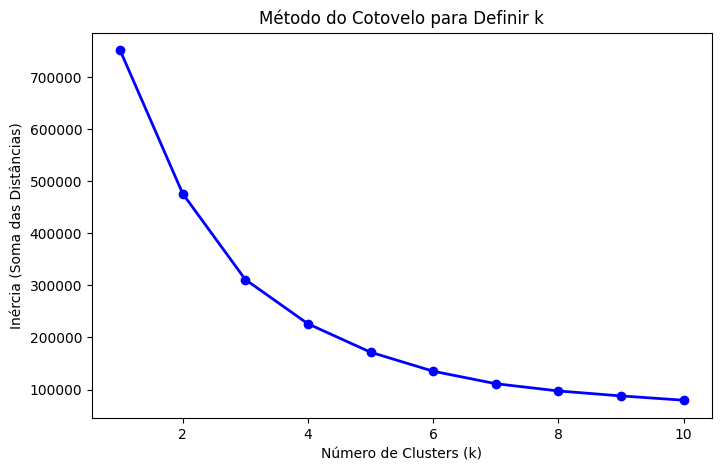

In [ ]:
features = clientes_features[["gmv_total", "num_transacoes"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'o-', linewidth=2, color="blue")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia (Soma das Distâncias)")
plt.title("Método do Cotovelo para Definir k")
plt.show()

3. Aplicação do K-means com 4 clusters

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clientes_features["cluster"] = kmeans.fit_predict(X_scaled)

4. Mapeamento dos clusters por ano

In [ ]:
cluster_order = clientes_features.groupby("cluster")["gmv_total"].mean().sort_values().index
perfil_map = {
    cluster_order[0]: "Baixo",
    cluster_order[1]: "Médio",
    cluster_order[2]: "Alto",
    cluster_order[3]: "Muito Alto",
}
clientes_features["perfil_cliente"] = clientes_features["cluster"].map(perfil_map)

df_2021_insight["date_purchase"] = pd.to_datetime(df_2021_insight["date_purchase"], errors="coerce")
df_2021_insight['ano'] = df_2021_insight['date_purchase'].dt.year


df_final = pd.merge(
    df_2021_insight,
    clientes_features[['fk_contact', 'perfil_cliente']],
    on='fk_contact'
)


perfil_map = {"Baixo": 1, "Médio": 2, "Alto": 3, "Muito Alto": 4}
df_final['perfil_cliente_num'] = df_final['perfil_cliente'].map(perfil_map)

df_final.head()

,nk_ota_localizer_id,fk_contact,date_purchase,time_purchase,place_origin_departure,place_destination_departure,place_origin_return,place_destination_return,fk_departure_ota_bus_company,fk_return_ota_bus_company,...,place_origin_departure_mock,place_destination_departure_mock,place_origin_return_mock,place_destination_return_mock,fk_departure_ota_bus_company_mock,fk_return_ota_bus_company_mock,fk_contact_mock,ano,perfil_cliente,perfil_cliente_num
0,aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181...,ceea0de820a6379f2c4215bddaec66c33994b304607e56...,2021-02-23,20:08:25,7688b6ef52555962d008fff894223582c484517cea7da4...,23765fc69c4e3c0b10f5d15471dc2245e2a19af16b513f...,0,0,48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c...,1,...,cidade_1,cidade_49,cidade_2789,cidade_2789,viacao_1,viacao_256,contact_1,2021,Baixo,1
1,948356b25b90c0c87c147cead27483c481edda1dacc4c8...,37f13b6dae3cfd6e82caf88c4e361a5b2035b66c383ba2...,2021-02-11,22:25:15,d26eae87829adde551bf4b852f9da6b8c3c2db9b65b8b6...,482d9673cfee5de391f97fde4d1c84f9f8d6f2cf0784fc...,0,0,1dfacb2ea5a03e0a915999e03b5a56196f1b1664d2f768...,1,...,cidade_2,cidade_101,cidade_2789,cidade_2789,viacao_2,viacao_256,contact_2,2021,Baixo,1
2,2ee9d0978acb5e113d0b3f846ab3f88c5a426321da8f87...,e15109b0b8e9f6f1554e560837eb55543f035f91d8be4f...,2021-02-19,19:11:40,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,be47addbcb8f60566a3d7fd5a36f8195798e2848b36819...,0,0,1d0ebea552eb43d0b1e1561f6de8ae92e3de7f1abec523...,1,...,cidade_3,cidade_269,cidade_2789,cidade_2789,viacao_3,viacao_256,contact_3,2021,Baixo,1
3,929cd361c225ec5d3510e14e8582fdcc61a24383cdb7a7...,f914295cdc6f40aae952cd1457650eac8a6f74a57a4923...,2021-07-02,11:41:19,90b5bc7f03c840b2efddb22ffdfc37dd12cb391b49aa0f...,f6103ca1e01bd200a9258a366b7e8c22a542e771bf11a0...,0,0,c6f3ac57944a531490cd39902d0f777715fd005efac9a3...,1,...,cidade_4,cidade_482,cidade_2789,cidade_2789,viacao_4,viacao_256,contact_4,2021,Baixo,1
4,f08c3f551a19f1ce13525825dbf0d0ce9c3492da92bbb2...,17427df9b085e934834e8fe1b6bce73f46f75facfa7f91...,2022-07-14,10:16:52,20ca98162ba780883712eb701c84e4c06f73aba78e9039...,a77b6cbdf6fae1676369dea1e1ea675e4c2400c9e43bd5...,0,0,96061e92f58e4bdcdee73df36183fe3ac64747c81c26f6...,1,...,cidade_5,cidade_628,cidade_2789,cidade_2789,viacao_5,viacao_256,contact_5,2022,Baixo,1


5. Análise detalhada do dataframe



In [ ]:
analise_detalhada = (
    df_final
    .groupby(['ano', 'perfil_cliente'])
    .agg(
        quantidade_clientes=('fk_contact', 'nunique'),
        quantidade_compras=('fk_contact', 'count')
    )
    .reset_index()
)

resultado_final = analise_detalhada.pivot_table(
    index='perfil_cliente',
    columns='ano',
    values=['quantidade_clientes', 'quantidade_compras'],
    fill_value=0
)

resultado_final = resultado_final.swaplevel(0, 1, axis=1).sort_index(axis=1)
ordem_perfis = ["Baixo", "Médio", "Alto", "Muito Alto"]
resultado_final = resultado_final.reindex(ordem_perfis)
print(resultado_final)

ano                           2021                                   2022  \
               quantidade_clientes quantidade_compras quantidade_clientes   
perfil_cliente                                                              
Baixo                     123304.0           209215.0            158117.0   
Médio                       5626.0            47746.0              7938.0   
Alto                          60.0             4227.0                80.0   
Muito Alto                     7.0             1461.0                 7.0   

ano                                              2023                     \
               quantidade_compras quantidade_clientes quantidade_compras   
perfil_cliente                                                             
Baixo                    282836.0            141079.0           279074.0   
Médio                     89009.0              7966.0            96067.0   
Alto                       5791.0                78.0             5920.0   
Muit

5. Plot do gráfico de perfil de clientes por ano

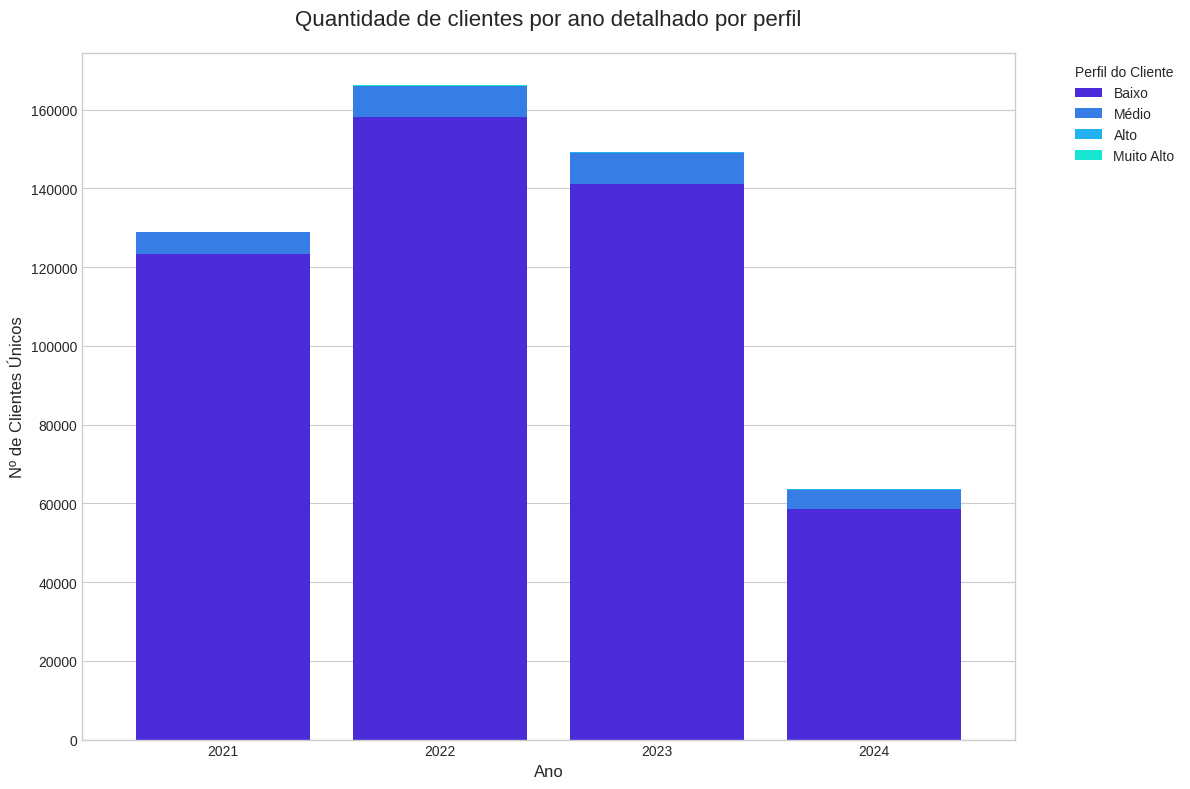

In [ ]:
df_clientes_por_ano = resultado_final.xs('quantidade_clientes', level=1, axis=1)

df_plot = df_clientes_por_ano.T

mapa_de_cores = {
    "Baixo": "#4A2AD9",
    "Médio": "#367DE5",
    "Alto": "#22B2F0",
    "Muito Alto": "#16E5D1"
}

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

df_plot.plot(kind='bar', stacked=True, ax=ax, color=mapa_de_cores, width=0.8)

ax.set_title('Quantidade de clientes por ano detalhado por perfil', fontsize=16, pad=20)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Nº de Clientes Únicos', fontsize=12)
plt.xticks(rotation=0)
ax.legend(title='Perfil do Cliente', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='x')

plt.tight_layout()
plt.show()

O gráfico revela que a maior parte da base de clientes está concentrada no perfil Baixo, enquanto os perfis mais elevados (Médio, Alto e Muito Alto) aparecem em volumes bem menores, mas ainda consistentes ao longo dos anos. Esse comportamento indica que há uma oportunidade clara de trabalhar com um clube de assinatura segmentado: para o perfil Baixo, o desafio é manter o engajamento e reduzir churn, oferecendo benefícios acessíveis que incentivem recorrência e fidelidade; já para os clientes de perfis mais altos, embora menos numerosos, o clube pode ser estruturado para maximizar valor por cliente, com vantagens exclusivas, cashback diferenciado e experiências premium que reforcem status. Dessa forma, a proposta de assinatura atua em duas frentes, escala nos clientes de baixo valor e rentabilidade nos de alto valor ajudando a sustentar o crescimento mesmo em cenários de queda de base.

6. Plot do gráfico de total de GMV por ano e perfil do cliente

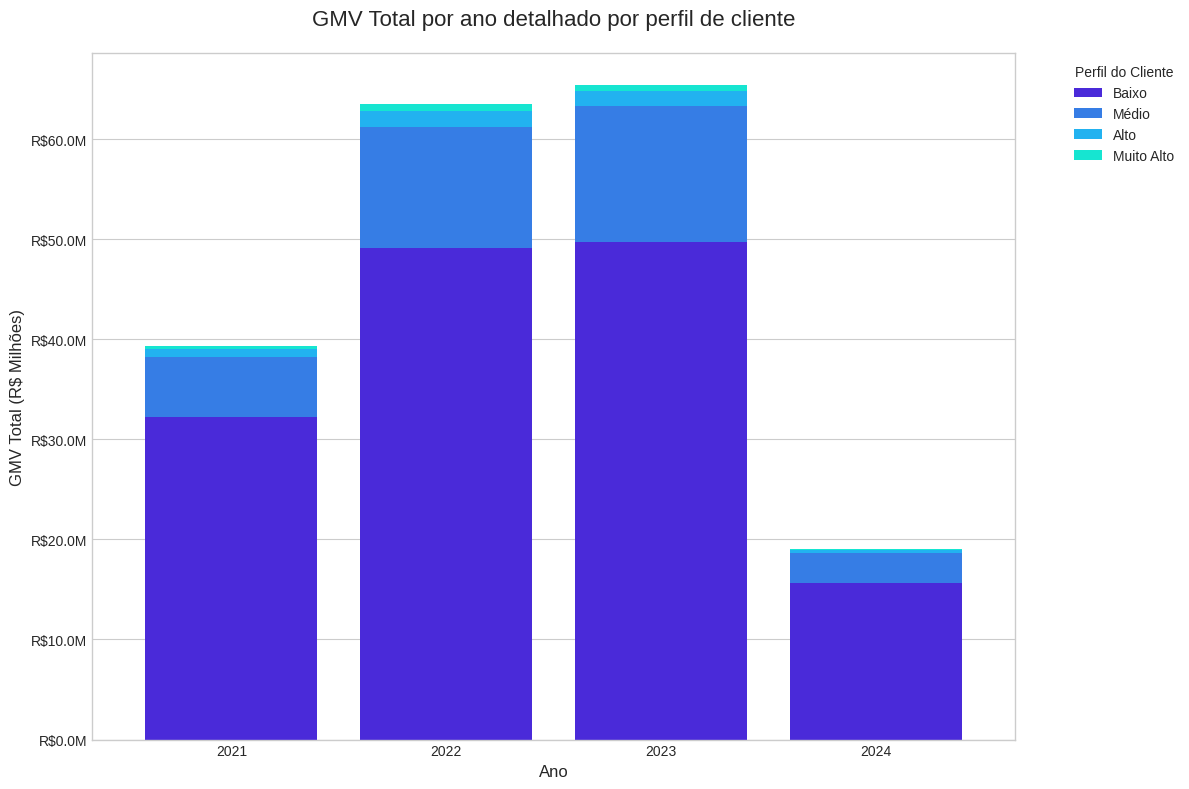

In [ ]:
analise_detalhada = (
    df_final
    .groupby(['ano', 'perfil_cliente'])
    .agg(
        quantidade_clientes=('fk_contact', 'nunique'),
        quantidade_compras=('fk_contact', 'count'),
        gmv_total=('gmv_success', 'sum')
    )
    .reset_index()
)

resultado_final = analise_detalhada.pivot_table(
    index='perfil_cliente',
    columns='ano',
    values=['quantidade_clientes', 'quantidade_compras', 'gmv_total'],
    fill_value=0
)

resultado_final = resultado_final.swaplevel(0, 1, axis=1).sort_index(axis=1)
ordem_perfis = ["Baixo", "Médio", "Alto", "Muito Alto"]
resultado_final = resultado_final.reindex(ordem_perfis)

df_gmv_por_ano = resultado_final.xs('gmv_total', level=1, axis=1)

df_plot = df_gmv_por_ano.T.sort_index()

mapa_de_cores = {
    "Baixo": "#4A2AD9",
    "Médio": "#367DE5",
    "Alto": "#22B2F0",
    "Muito Alto": "#16E5D1"
}

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

df_plot.plot(kind='bar', stacked=True, ax=ax, color=mapa_de_cores, width=0.8)

ax.set_title('GMV Total por ano detalhado por perfil de cliente', fontsize=16, pad=20)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('GMV Total (R$ Milhões)', fontsize=12)
plt.xticks(rotation=0)
ax.legend(title='Perfil do Cliente', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='x')

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'R${x/1e6:,.1f}M'.replace(',', '.')))

plt.tight_layout()
plt.show()

A análise do GMV revela que, embora a base de clientes seja majoritariamente de perfil Baixo, a receita da empresa depende criticamente de um pequeno, porém poderoso, grupo de clientes de perfis mais elevados que geram uma fatia de faturamento desproporcional à quantidade de clientes nessa categoria. Essa constatação aponta para a necessidade urgente de uma estratégia de fidelidade segmentada: por um lado, proteger e maximizar o valor dos clientes premium com benefícios exclusivos e, por outro, nutrir a base de menor valor para aumentar gradualmente seu potencial de compra. Implementar essa abordagem dupla criará uma receita mais resiliente e menos vulnerável a quedas na base de clientes, garantindo um crescimento mais sustentável.

7. Plot do gráfico de total de compras por mês com detalhamento por ano

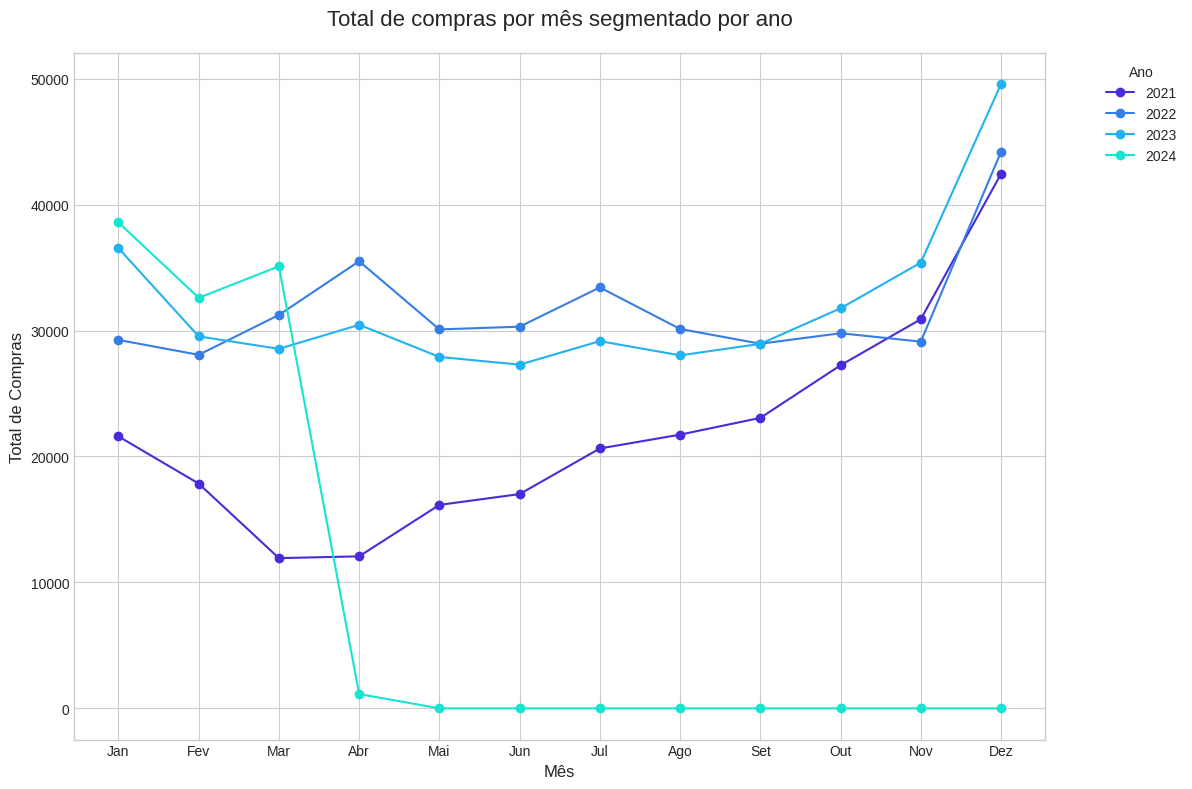

In [ ]:
df_final['mes'] = df_final['date_purchase'].dt.month
df_final['ano'] = df_final['date_purchase'].dt.year

compras_mensais = (
    df_final
    .groupby(['ano', 'mes'])
    .agg(total_compras=('fk_contact', 'count'))
    .reset_index()
)

compras_mensais_pivot = compras_mensais.pivot(index='mes', columns='ano', values='total_compras').fillna(0)

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

mapa_cores_ano = {
    2021: "#4A2AD9",
    2022: "#367DE5",
    2023: "#22B2F0",
    2024: "#16E5D1"

}

compras_mensais_pivot.plot(ax=ax, marker='o', color=mapa_cores_ano)

ax.set_title('Total de compras por mês segmentado por ano', fontsize=16, pad=20)
ax.set_xlabel('Mês', fontsize=12)
ax.set_ylabel('Total de Compras', fontsize=12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels([
    'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
    'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'
])
ax.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)

plt.tight_layout()
plt.show()

 Analisando o gráfico é possível identificar uma forte sazonalidade no volume de vendas com um ciclo anual bem definido, marcado por um pico expressivo de compras nos meses de novembro e dezembro, impulsionado por eventos de fim de ano. Em contrapartida, o início do ano, especialmente o primeiro trimestre, tende a ser um período de menor volume, caracterizando uma queda natural após o pico das festas. Essa previsibilidade permite um planejamento estratégico focado em maximizar a receita no final do ano com campanhas robustas, e em criar iniciativas de engajamento para sustentar as vendas durante os meses de baixa.

# Previsão de compras - 7 e 30 dias

1. Importação de bibliotecas necessárias

In [ ]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import (
    roc_auc_score, average_precision_score, log_loss, brier_score_loss,
    precision_recall_curve, roc_curve, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score
)

2. Filtrar perfil e criar targets de 7d/30d

In [ ]:
def build_targets(df_final: pd.DataFrame) -> pd.DataFrame:
    df = df_final[df_final["perfil_cliente_num"] == 1].copy()


    df["purchase_datetime"] = pd.to_datetime(
        df["date_purchase"].astype(str) + " " + df["time_purchase"].astype(str),
        errors="coerce"
    )


    df.sort_values(["fk_contact", "purchase_datetime"], inplace=True)
    df["next_purchase_datetime"] = df.groupby("fk_contact")["purchase_datetime"].shift(-1)
    df["days_to_next"] = (df["next_purchase_datetime"] - df["purchase_datetime"]).dt.days


    df["target_7d"]  = df["days_to_next"].apply(lambda x: 1 if pd.notnull(x) and x <= 7  else 0)
    df["target_30d"] = df["days_to_next"].apply(lambda x: 1 if pd.notnull(x) and x <= 30 else 0)


    df["dow"]   = df["purchase_datetime"].dt.dayofweek
    df["hour"]  = df["purchase_datetime"].dt.hour
    df["month"] = df["purchase_datetime"].dt.month

    return df

3. Definir features

In [ ]:
def prepare_feature_sets(df: pd.DataFrame):
    num_cols = ["gmv_success", "total_tickets_quantity_success"]
    num_cols += ["dow", "hour", "month"]

    cat_cols = [
        "place_origin_departure", "place_destination_departure",
        "place_origin_return", "place_destination_return",
        "fk_departure_ota_bus_company", "fk_return_ota_bus_company",
        "ano"
    ]

    if "ano" in df.columns and not pd.api.types.is_string_dtype(df["ano"]):
        df["ano"] = df["ano"].astype("string")

    X = df[num_cols + cat_cols].copy()
    return X, num_cols, cat_cols

4. Split por cliente (para evitar vazamento)

In [ ]:
def group_train_test_split(X, y, groups, test_size=0.2, random_state=42):
    splitter = GroupShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    train_idx, test_idx = next(splitter.split(X, y, groups=groups))
    return train_idx, test_idx

5. Pipeline

In [ ]:
def make_pipeline(num_cols, cat_cols):
    pre = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(with_mean=True, with_std=True), num_cols),
            ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=True), cat_cols)
        ]
    )
    base_clf = LogisticRegression(
        max_iter=2000, solver="lbfgs", n_jobs=None
    )

    clf = CalibratedClassifierCV(estimator=base_clf, method="sigmoid", cv=5)
    pipe = Pipeline(steps=[("pre", pre), ("clf", clf)])
    return pipe

6. Métricas baseadas em probabilidades e escolha de limiar

In [ ]:
def evaluate_probabilities(y_true, y_proba):
    metrics = {}
    metrics["roc_auc"] = roc_auc_score(y_true, y_proba)
    metrics["pr_auc"]  = average_precision_score(y_true, y_proba)
    eps = 1e-15
    y_proba_clip = np.clip(y_proba, eps, 1 - eps)
    metrics["log_loss"] = log_loss(y_true, y_proba_clip)
    metrics["brier"]    = brier_score_loss(y_true, y_proba_clip)


    prec, rec, th_pr = precision_recall_curve(y_true, y_proba)
    fpr, tpr, th_roc = roc_curve(y_true, y_proba)


    f1_scores = 2 * (prec * rec) / (prec + rec + 1e-12)
    best_f1_idx = np.nanargmax(f1_scores)

    th_f1 = th_pr[best_f1_idx-1] if best_f1_idx > 0 and best_f1_idx-1 < len(th_pr) else 0.5

    j_scores = tpr - fpr
    j_best_idx = np.argmax(j_scores)
    th_j = th_roc[j_best_idx] if j_best_idx < len(th_roc) else 0.5

    metrics["best_threshold_f1"] = float(th_f1)
    metrics["best_threshold_j"]  = float(th_j)

    return metrics, (prec, rec, th_pr), (fpr, tpr, th_roc)

def binarize_and_report(y_true, y_proba, threshold):
    y_hat = (y_proba >= threshold).astype(int)
    report = {
        "precision": precision_score(y_true, y_hat, zero_division=0),
        "recall": recall_score(y_true, y_hat, zero_division=0),
        "f1": f1_score(y_true, y_hat, zero_division=0),
        "confusion_matrix": confusion_matrix(y_true, y_hat).tolist(),
        "classification_report": classification_report(y_true, y_hat, zero_division=0, output_dict=True)
    }
    return report

7. Treina e avalia para um target

In [ ]:
def train_and_score(df, target_col):
    X, num_cols, cat_cols = prepare_feature_sets(df)
    y = df[target_col].astype(int).values
    groups = df["fk_contact"].values

    train_idx, test_idx = group_train_test_split(X, y, groups)
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    pipe = make_pipeline(num_cols, cat_cols)
    pipe.fit(X_train, y_train)

    y_proba = pipe.predict_proba(X_test)[:, 1]

    prob_metrics, pr_curves, roc_curves = evaluate_probabilities(y_test, y_proba)

    rep_f1 = binarize_and_report(y_test, y_proba, prob_metrics["best_threshold_f1"])
    rep_j  = binarize_and_report(y_test, y_proba, prob_metrics["best_threshold_j"])

    out = {
        "pipeline": pipe,
        "y_test": y_test,
        "y_proba": y_proba,
        "probability_metrics": prob_metrics,
        "report_at_best_f1": rep_f1,
        "report_at_best_j": rep_j,
        "pr_curves": pr_curves,
        "roc_curves": roc_curves,
        "test_index": test_idx
    }
    return out

8. Execução completa

In [ ]:
df = build_targets(df_final)

df = df[df["purchase_datetime"].notna()].copy()

res_7d  = train_and_score(df, "target_7d")
res_30d = train_and_score(df, "target_30d")

def summarize(result, label):
    m = result["probability_metrics"]
    print(f"\n=== {label} ===")
    print(f"ROC-AUC:  {m['roc_auc']:.4f}")
    print(f"PR-AUC:   {m['pr_auc']:.4f}")
    print(f"LogLoss:  {m['log_loss']:.4f}")
    print(f"Brier:    {m['brier']:.4f}")
    print(f"Best th (F1): {m['best_threshold_f1']:.3f} | F1: {result['report_at_best_f1']['f1']:.4f} "
          f"| Prec: {result['report_at_best_f1']['precision']:.4f} | Rec: {result['report_at_best_f1']['recall']:.4f}")
    print(f"Best th (J) : {m['best_threshold_j']:.3f} | F1: {result['report_at_best_j']['f1']:.4f} "
          f"| Prec: {result['report_at_best_j']['precision']:.4f} | Rec: {result['report_at_best_j']['recall']:.4f}")

summarize(res_7d , "Compra em até 7 dias")
summarize(res_30d, "Compra em até 30 dias")


=== Compra em até 7 dias ===
ROC-AUC:  0.5957
PR-AUC:   0.2409
LogLoss:  0.4724
Brier:    0.1492
Best th (F1): 0.171 | F1: 0.3370 | Prec: 0.2145 | Rec: 0.7856
Best th (J) : 0.192 | F1: 0.3309 | Prec: 0.2282 | Rec: 0.6023

=== Compra em até 30 dias ===
ROC-AUC:  0.5879
PR-AUC:   0.3597
LogLoss:  0.5999
Brier:    0.2055
Best th (F1): 0.249 | F1: 0.4724 | Prec: 0.3225 | Rec: 0.8829
Best th (J) : 0.304 | F1: 0.4427 | Prec: 0.3507 | Rec: 0.5998


9. Histogramas

In [ ]:
def plot_histogram(result, label, use_threshold="best_threshold_f1"):
    y_proba = result["y_proba"]
    threshold = result["probability_metrics"][use_threshold]

    plt.figure(figsize=(6,4))
    plt.hist(y_proba, bins=20, edgecolor="k", alpha=0.7)
    plt.axvline(threshold, color="red", linestyle="--", linewidth=2,
                label=f"Limiar ({use_threshold}): {threshold:.2f}")
    plt.title(f"Histograma de probabilidades - {label}")
    plt.xlabel("Probabilidade prevista")
    plt.ylabel("Frequência")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()


plot_histogram(res_7d, "Compra em até 7 dias")
plot_histogram(res_30d, "Compra em até 30 dias")

10. Adicionar as previsões para todos os clientes com perfil == 1

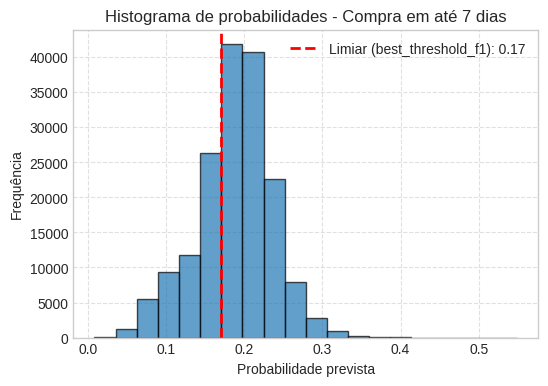

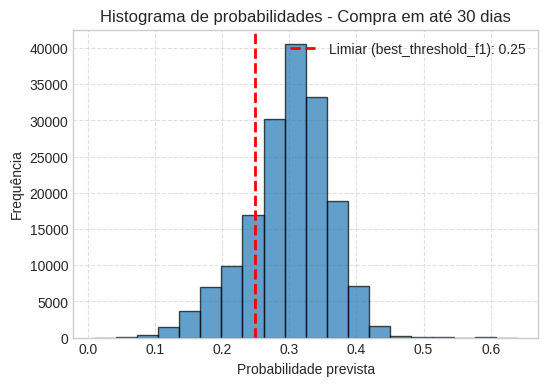

In [ ]:
def add_predictions_full(df, result, prefix):
    """
    Aplica o pipeline treinado em todas as linhas do df (perfil_cliente_num = 1).
    Retorna df com colunas de probabilidade e classe.
    """

    X_all, _, _ = prepare_feature_sets(df)
    y_proba_all = result["pipeline"].predict_proba(X_all)[:, 1]


    df[f"{prefix}_proba"] = y_proba_all
    th = result["probability_metrics"]["best_threshold_f1"]
    df[f"{prefix}_pred"] = (y_proba_all >= th).astype(int)

    return df


df_final_pred = df_final.copy()


df_final_pred["pred7d_proba"] = np.nan
df_final_pred["pred7d_pred"]  = np.nan
df_final_pred["pred30d_proba"] = np.nan
df_final_pred["pred30d_pred"]  = np.nan


mask = df_final_pred["perfil_cliente_num"] == 1
df_pred_sub = df.loc[mask].copy()


df_pred_sub = add_predictions_full(df_pred_sub, res_7d,  "pred7d")
df_pred_sub = add_predictions_full(df_pred_sub, res_30d, "pred30d")


df_final_pred.update(
    df_pred_sub[["pred7d_proba","pred7d_pred","pred30d_proba","pred30d_pred"]]
)

11. Exportação dos csv

In [ ]:
df_final_pred.to_csv("df_final_pred.csv", index = False)
df_final.to_csv("df_final.csv", index=False)